In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np



In [84]:
df = pd.read_csv('GISP20002019.csv')
print(df.head())

df.iloc[:, 5:len(df.columns)] = df.iloc[:, 5:len(df.columns)].apply(pd.to_numeric, errors='coerce')
## errors = coerce converts missing data to NaN
print(df.head())


   Obs CLINIC  YEAR         GENDERSP  TOTAL Susceptible TetI PenI PenI_TetI  \
0    1    ALB  2000              MSW    143          10    2   36        68   
1    2    ALB  2000              MSM      9           .    .    1         5   
2    3    ALB  2000             MSMW      5           .    .    2         3   
3    4    ALB  2000  Oth/Unk/Missing      4           .    1    .         1   
4    5    ALB  2001              MSW    127          12    3   40        57   

  TetR  ... AziRS_TetR_CipI_PenI CipR CipR_TetR AziRS_CipI_PenI_TetI  \
0    2  ...                    .    .         .                    .   
1    .  ...                    .    .         .                    .   
2    .  ...                    .    .         .                    .   
3    .  ...                    .    .         .                    .   
4    1  ...                    .    .         .                    .   

  CfxRS_CipR_TetR_PenI AziRS_TetR AziRS_CipR_PenR_TetI  \
0                    .          . 

/var/folders/3f/vvt02dh16jddhc3q1tl6f3zh0000gn/T/ipykernel_91877/1212987296.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 5:len(df.columns)] = df.iloc[:, 5:len(df.columns)].apply(pd.to_numeric, errors='coerce')


In [1]:
#Compute Total Use of Drug Per Row
drugs = ["CIP", "TET", "PEN", "AZI", "CFX", "CRO"]
drugs_name = {
    'CIP': 'Ciprofloxacin',
    'TET': 'Tetracycline',
    'PEN': 'Penicillin',
    'AZI': 'Azithromycin',
    'CFX': 'Cefixime',
    'CRO': 'Ceftriaxone'}

drugsDict = {}
for drug in drugs:
    drugsDict[drug] = list(df.columns)

for variable in range(len(list(df.columns))):
    if "CipR" not in drugsDict["CIP"][variable]:
        drugsDict["CIP"][variable] = None
    if "TetR" not in drugsDict["TET"][variable]:
        drugsDict["TET"][variable] = None
    if "PenR" not in drugsDict["PEN"][variable]:
        drugsDict["PEN"][variable] = None
    if "AziRS" not in drugsDict["AZI"][variable]:
        drugsDict["AZI"][variable] = None
    if "CfxRS" not in drugsDict["CFX"][variable]:
        drugsDict["CFX"][variable] = None
    if "CroRS" not in drugsDict["CRO"][variable]:
        drugsDict["CRO"][variable] = None
        
for drug in drugs:
    drugsDict[drug] = list(filter(None, drugsDict[drug]))
    df["Total"+drug] = df[drugsDict[drug]].sum(axis=1, skipna=True)
    

NameError: name 'df' is not defined

In [86]:
 #Sort Add Region Indicator to Each Row
west = ['POR', 'PHX', 'HON', 'SDG', 'SFO', 'ANC', 'SEA', 'DEN', 'LVG', 'ORA', 'LBC', 'SLC', 'LAX']
southwest = ['OKC','MIN', 'ALB', 'DAL']
midwest = ['KCY','CHI', 'PON', 'CIN', 'JAC', 'IND', 'STL','DTR', 'MIL', 'COL', 'CLE']
southeast = ['GRB', 'NOR','WDC','MIA', 'BHM','FBG','ATL', 'RIC']
northeast = ['BUF','BOS', 'CAM', 'NYC', 'BAL', 'PHI']

df['Region'] = df['CLINIC'].apply(lambda x: 
    'West' if (x in west) else (
        'Southwest' if (x in southwest) else(
            'Midwest' if (x in midwest) else(
                'Southeast' if (x in southeast) else(
                    'Northeast' if (x in northeast) else 'Other'))))) 
    

In [3]:
 
    #Compute Drug Resistance Statistics and input into dataframe called "overall"
overall = pd.DataFrame([],[])
for year in list(set(df["YEAR"])):
     df2 = df[df["YEAR"]==year]
     new = {'Year': year}
    
     new['OverallTotal'] = df2["TOTAL"].sum()
    
    
     for drug in drugs:
           new[drug+'_OverallTotal'] = df2["Total"+drug].sum()
           new[drug+'_OverallPct'] = (new[drug+'_OverallTotal']/new['OverallTotal'] )*100
           
           for gender in list(set(df["GENDERSP"])):       
                df3 = df2[df2["GENDERSP"]==gender]
            
                new[gender+"_Total"] = df3["TOTAL"].sum()
                new[gender+"_"+drug+"Total"] = df3["Total"+drug].sum()
                new[gender+"_"+drug+"Pct"] = (new[gender+"_"+drug+"Total"] / new[gender+"_Total"])*100
        
           for region in list(set(df["Region"])):       
                df4 = df2[df2["Region"]==region]
            
                new[region+"_Total"] = df4["TOTAL"].sum()
                new[region+"_"+drug+"_Total"] = df4["Total"+drug].sum()
                new[region+"_"+drug+"_Pct"] = (new[region+"_"+drug+"_Total"]/new[region+"_Total"])*100
    
     overall = overall.append(new, ignore_index = True)
overall["Year"] = overall["Year"].astype(int)


NameError: name 'pd' is not defined

In [2]:
#Overall Graph For All Drugs
xAxisYears = [2000, 2005, 2010, 2015, 2019]
figureCount = 1
plt.rcParams["figure.figsize"] = (12,5.5)
for drug in drugs:
    plt.plot(overall["Year"], overall[drug+"_OverallPct"], label=drug)
plt.title("Figure " + str(figureCount))
figureCount+=1

plt.xlabel("Years", fontsize=12)
plt.ylabel("% Resistant", fontsize=12)
plt.xticks(xAxisYears, fontsize=12)
plt.rcParams['figure.dpi'] = 300
plt.legend()
plt.show()
#plt.savefig("images/overall.png", facecolor='white', transparent=False)


NameError: name 'plt' is not defined

/var/folders/3f/vvt02dh16jddhc3q1tl6f3zh0000gn/T/ipykernel_91877/666923578.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


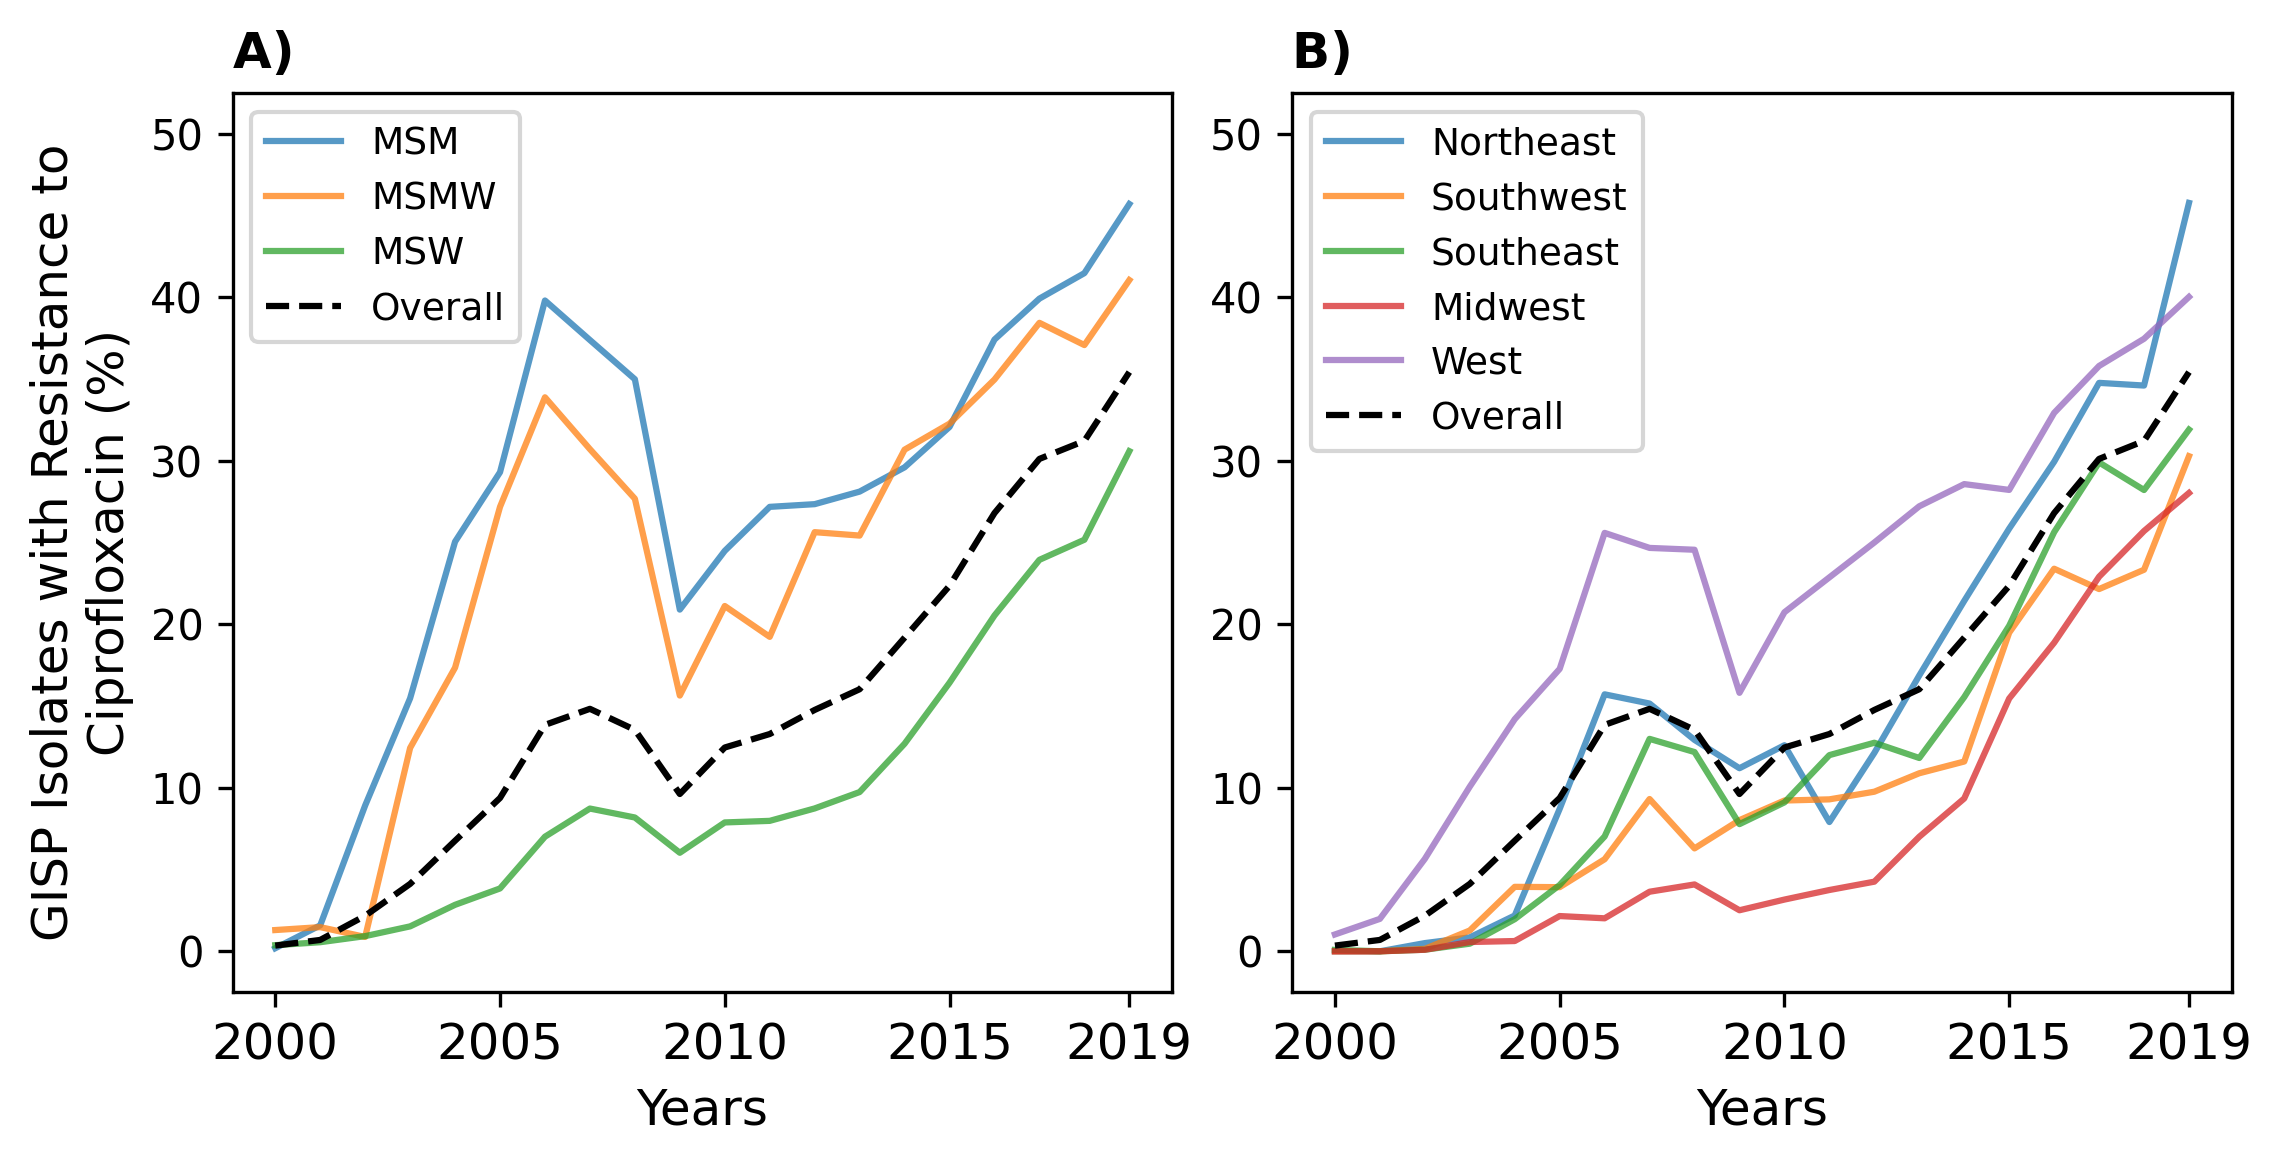

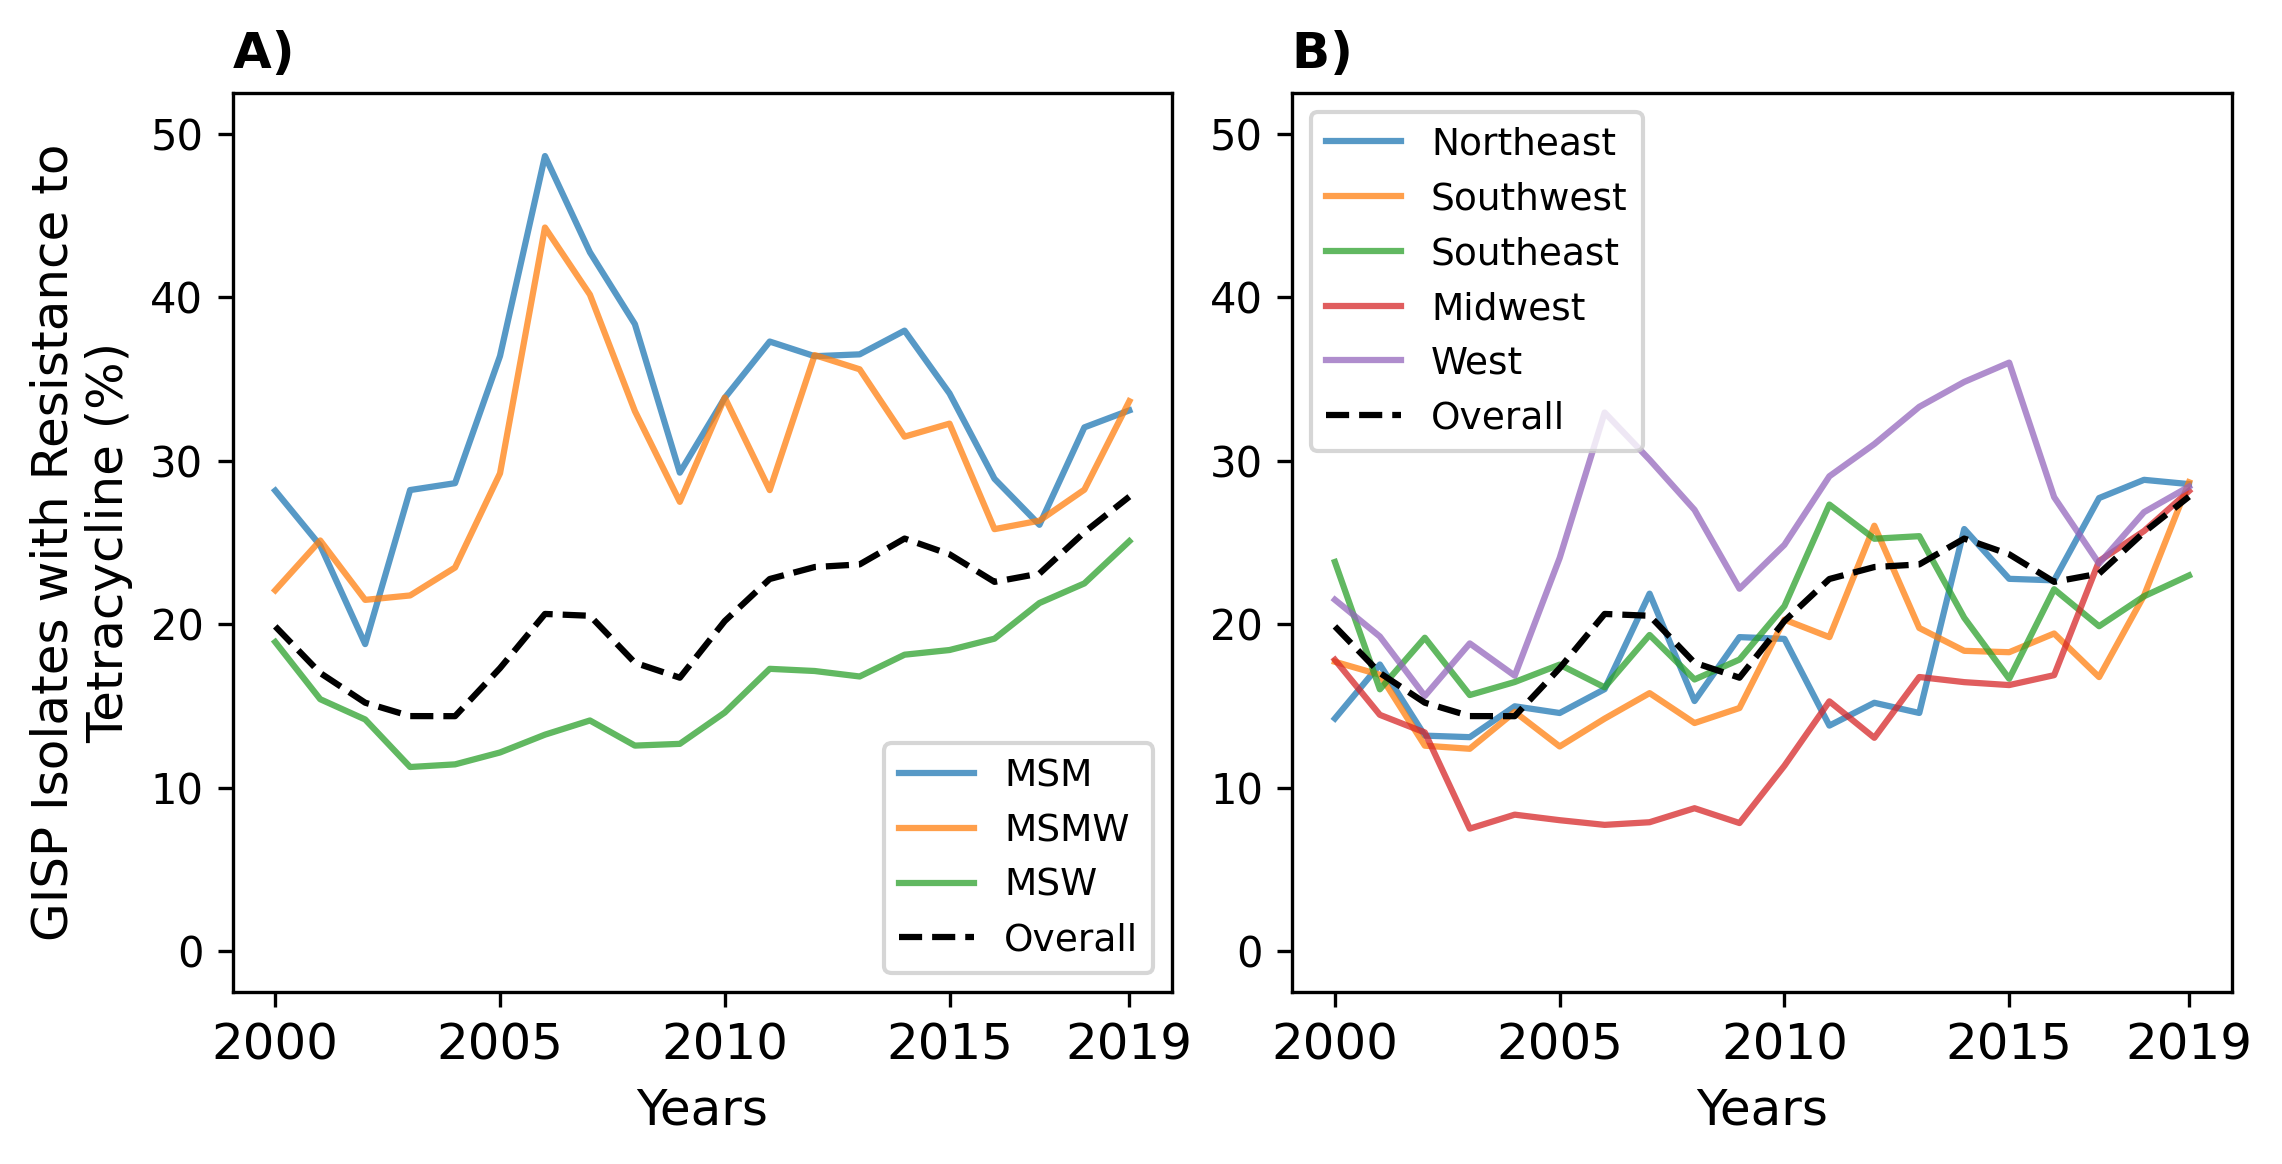

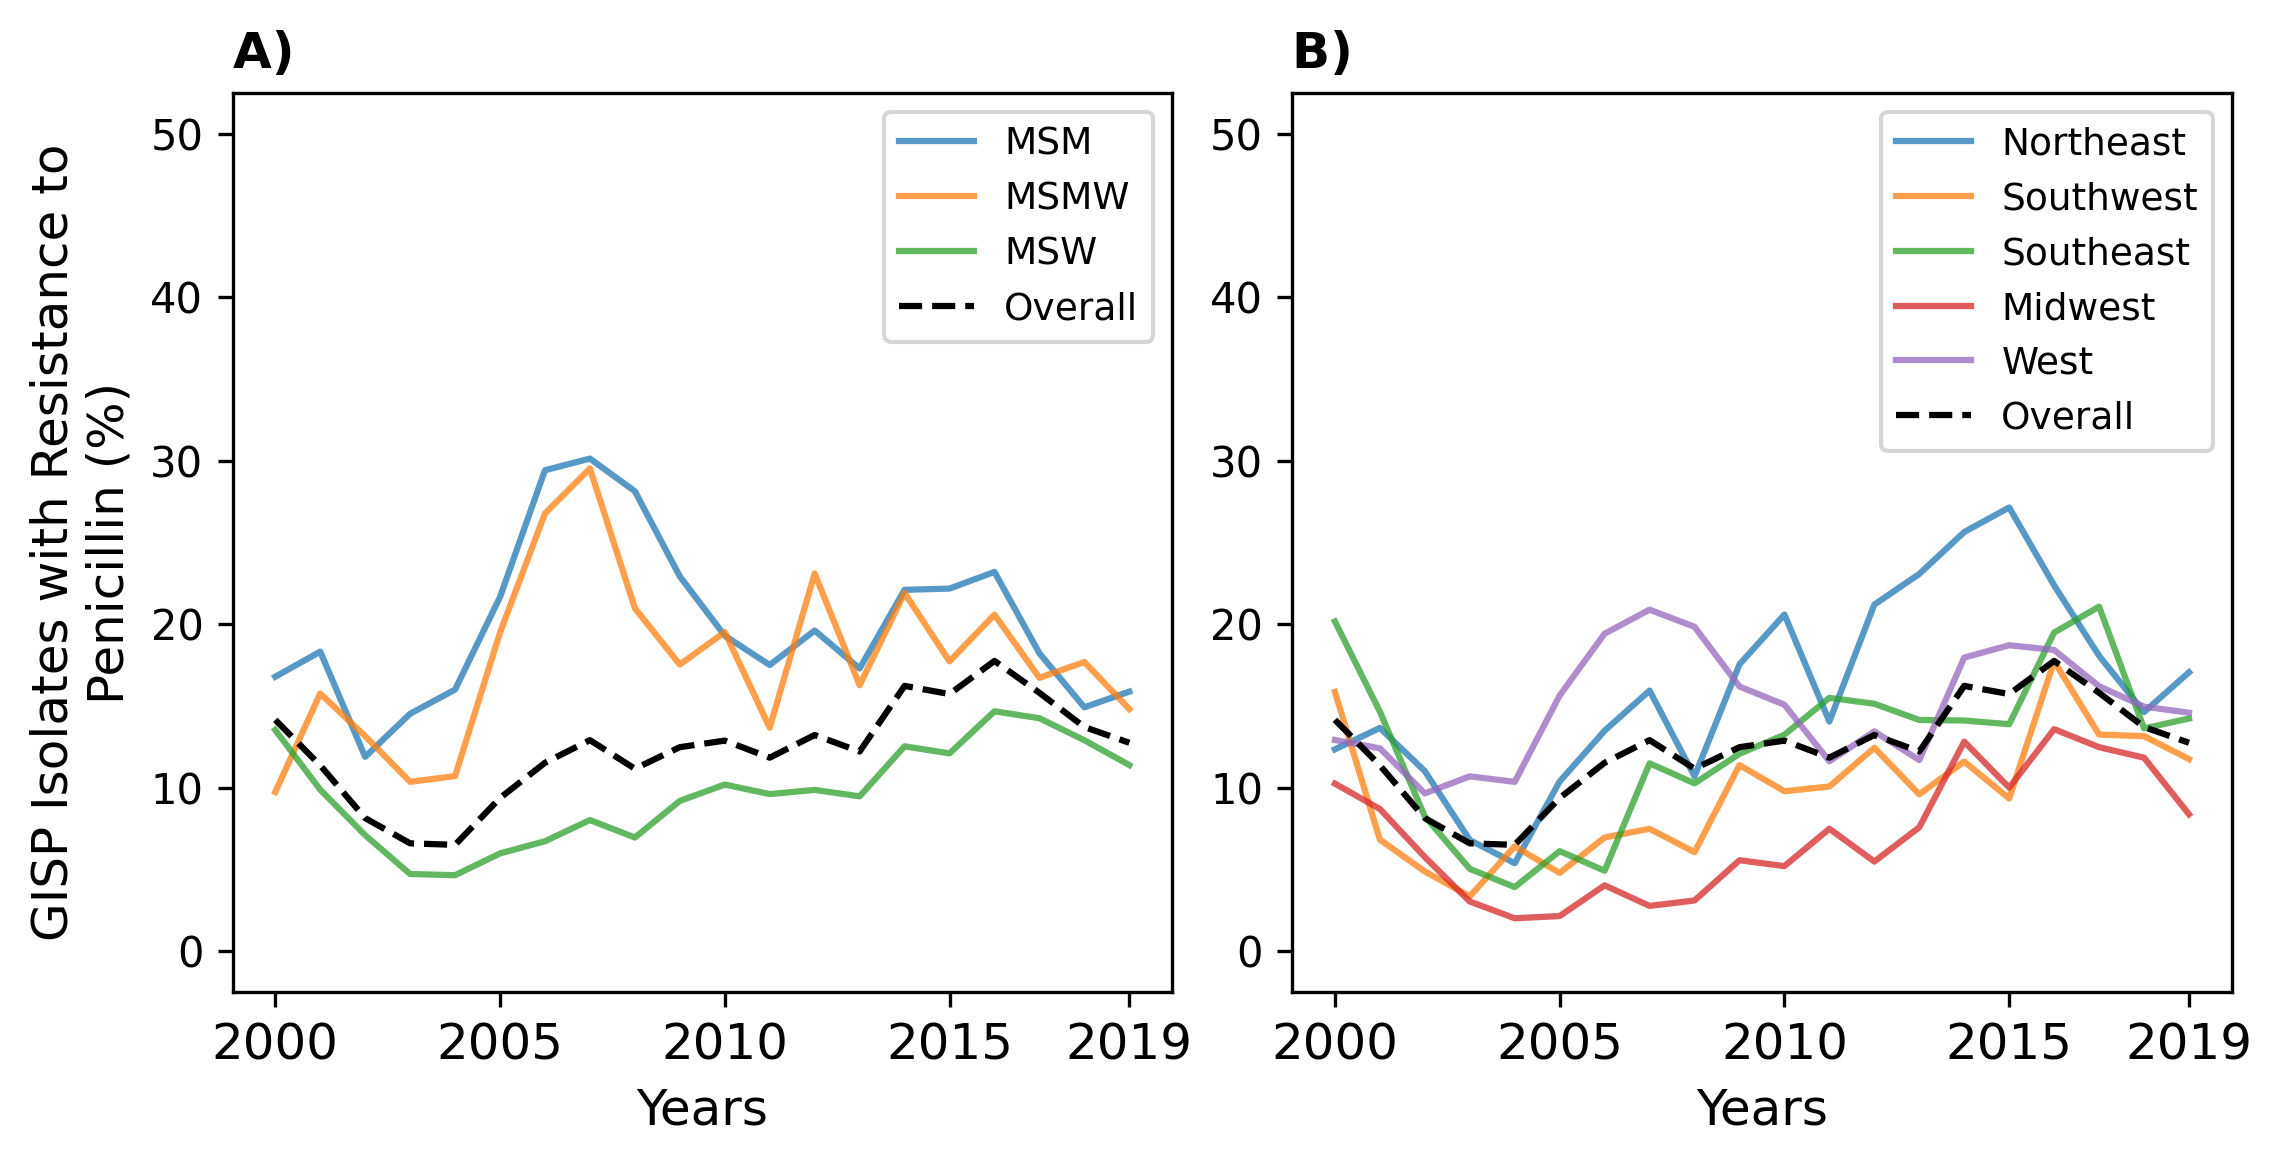

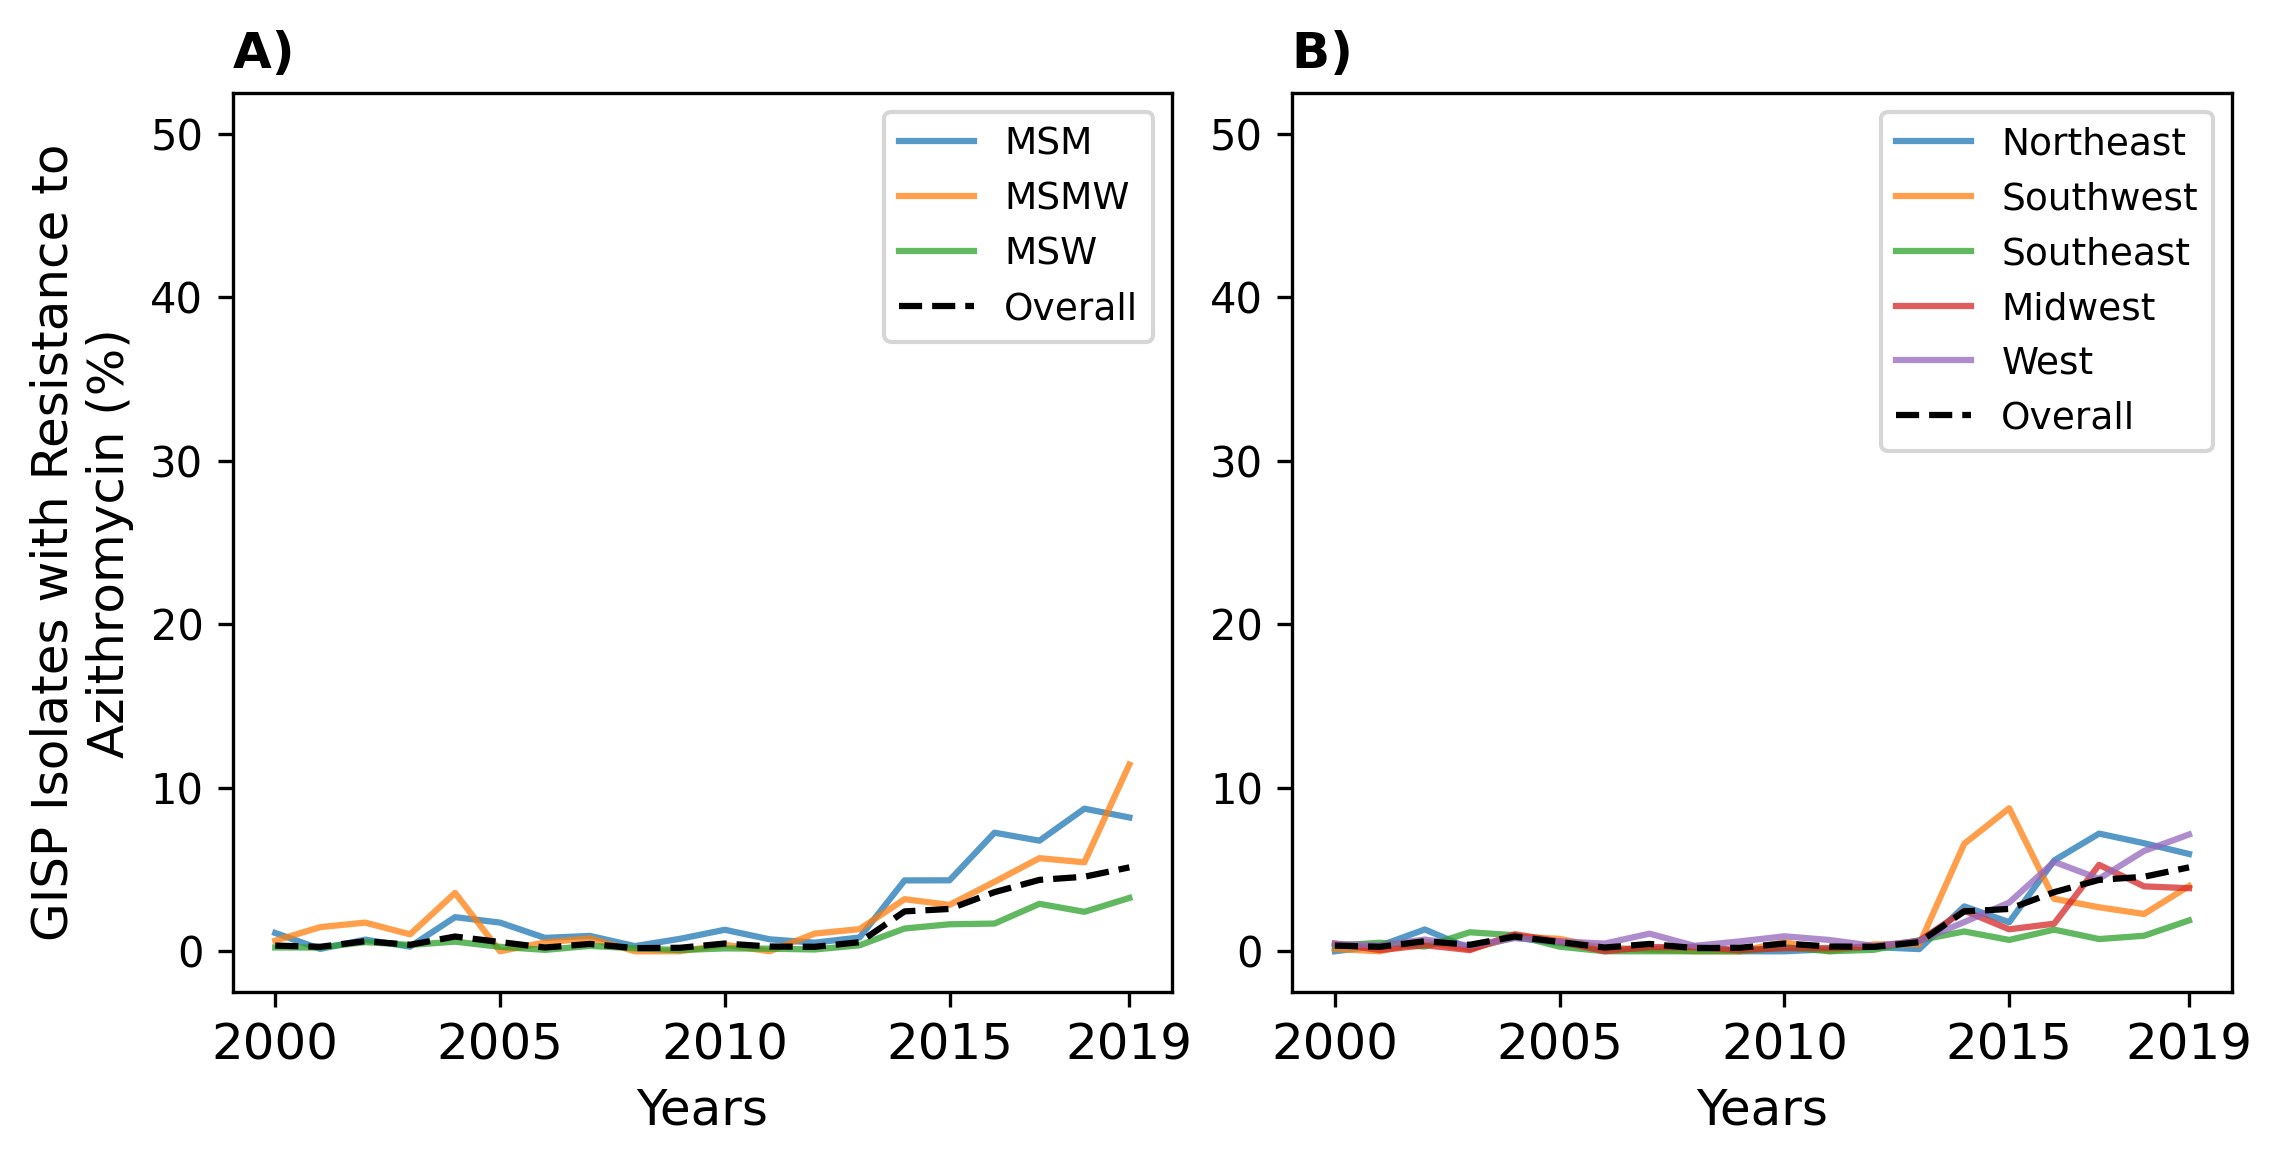

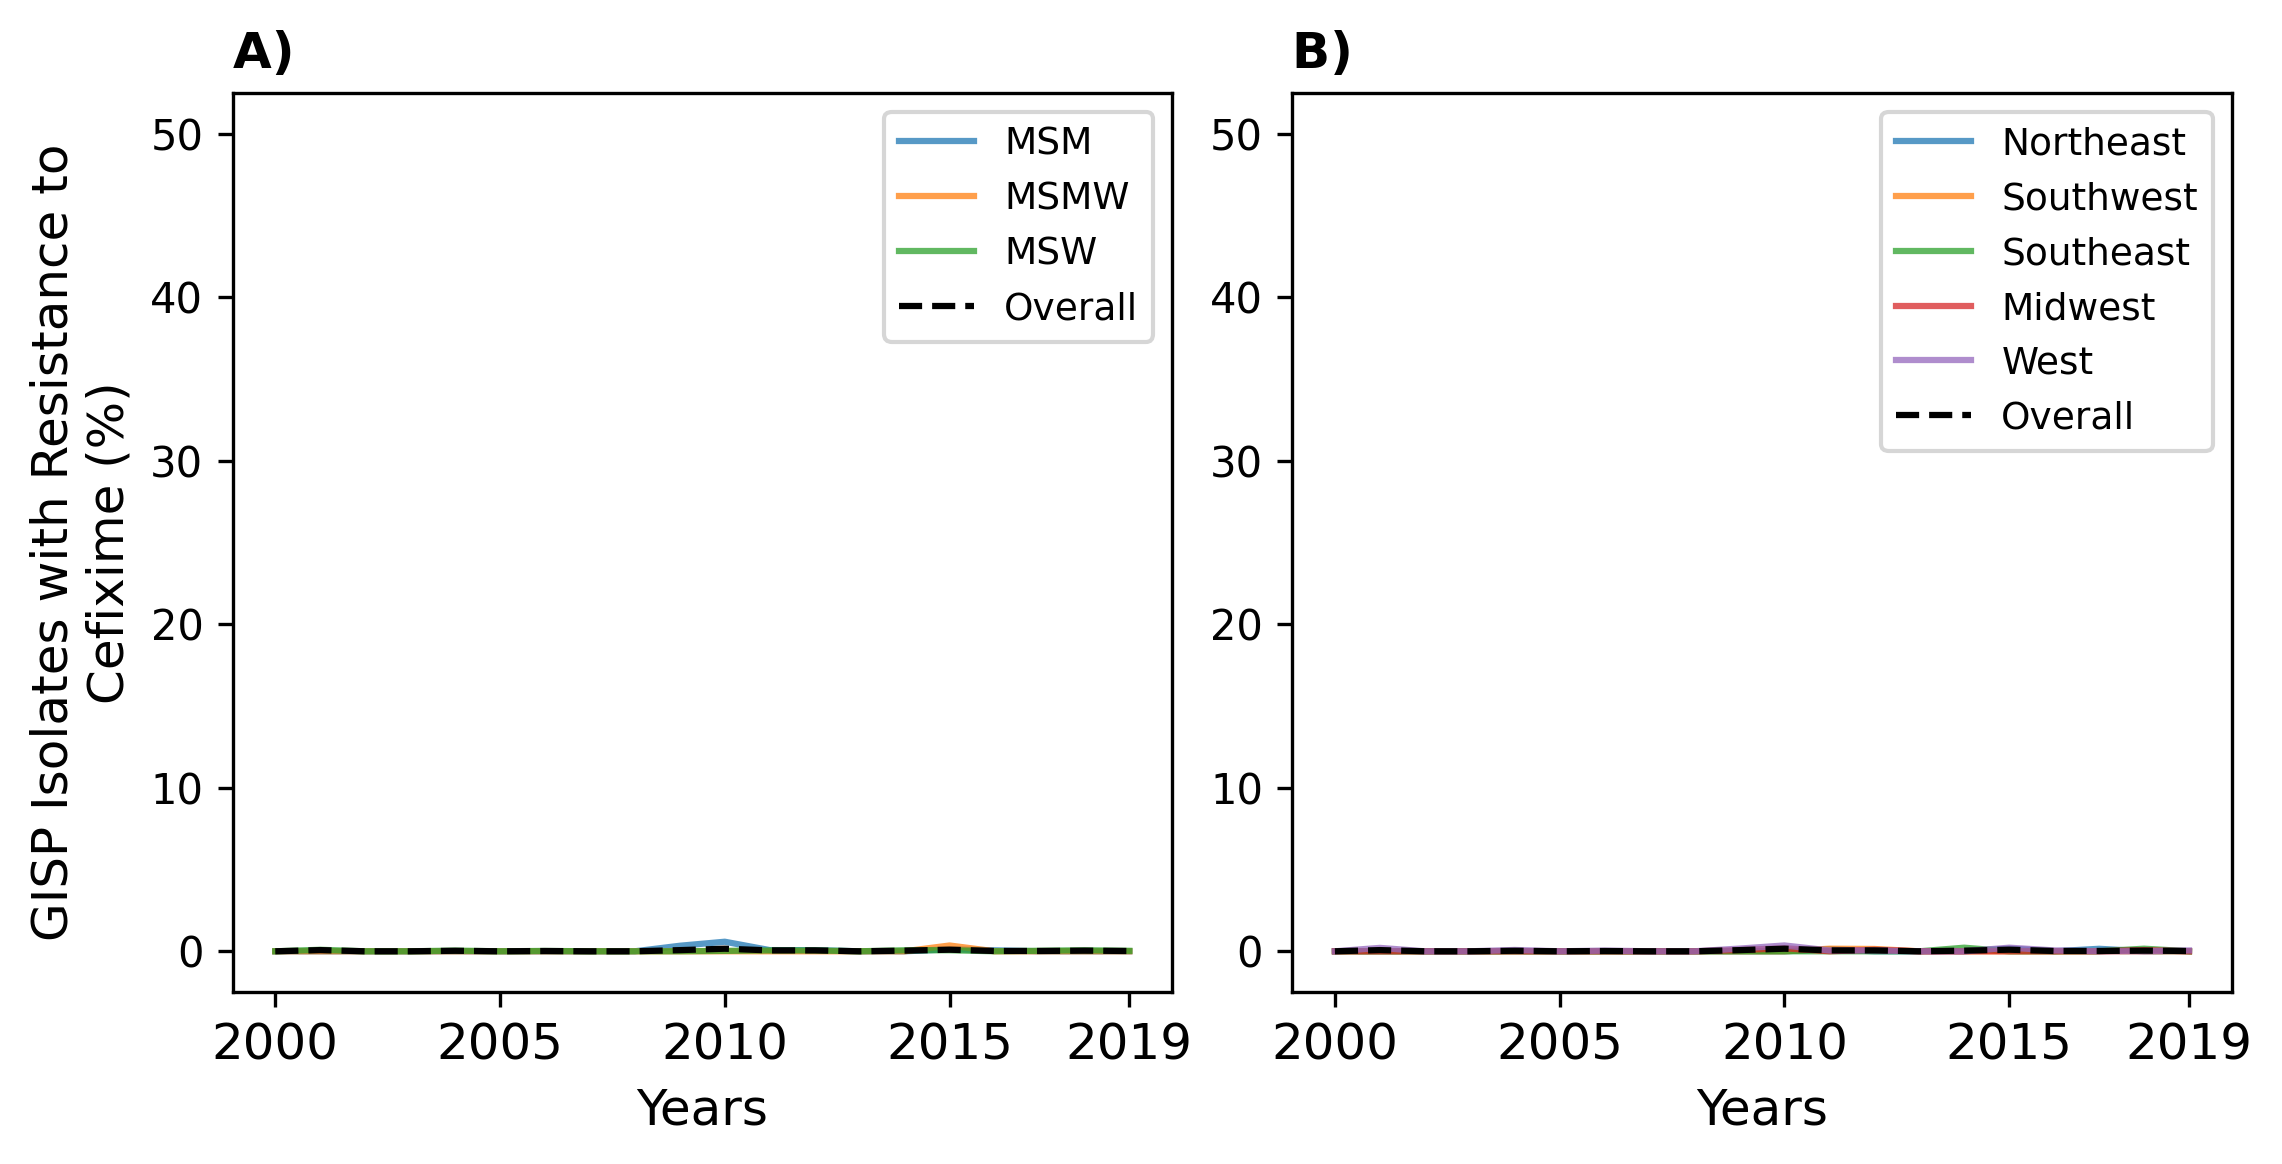

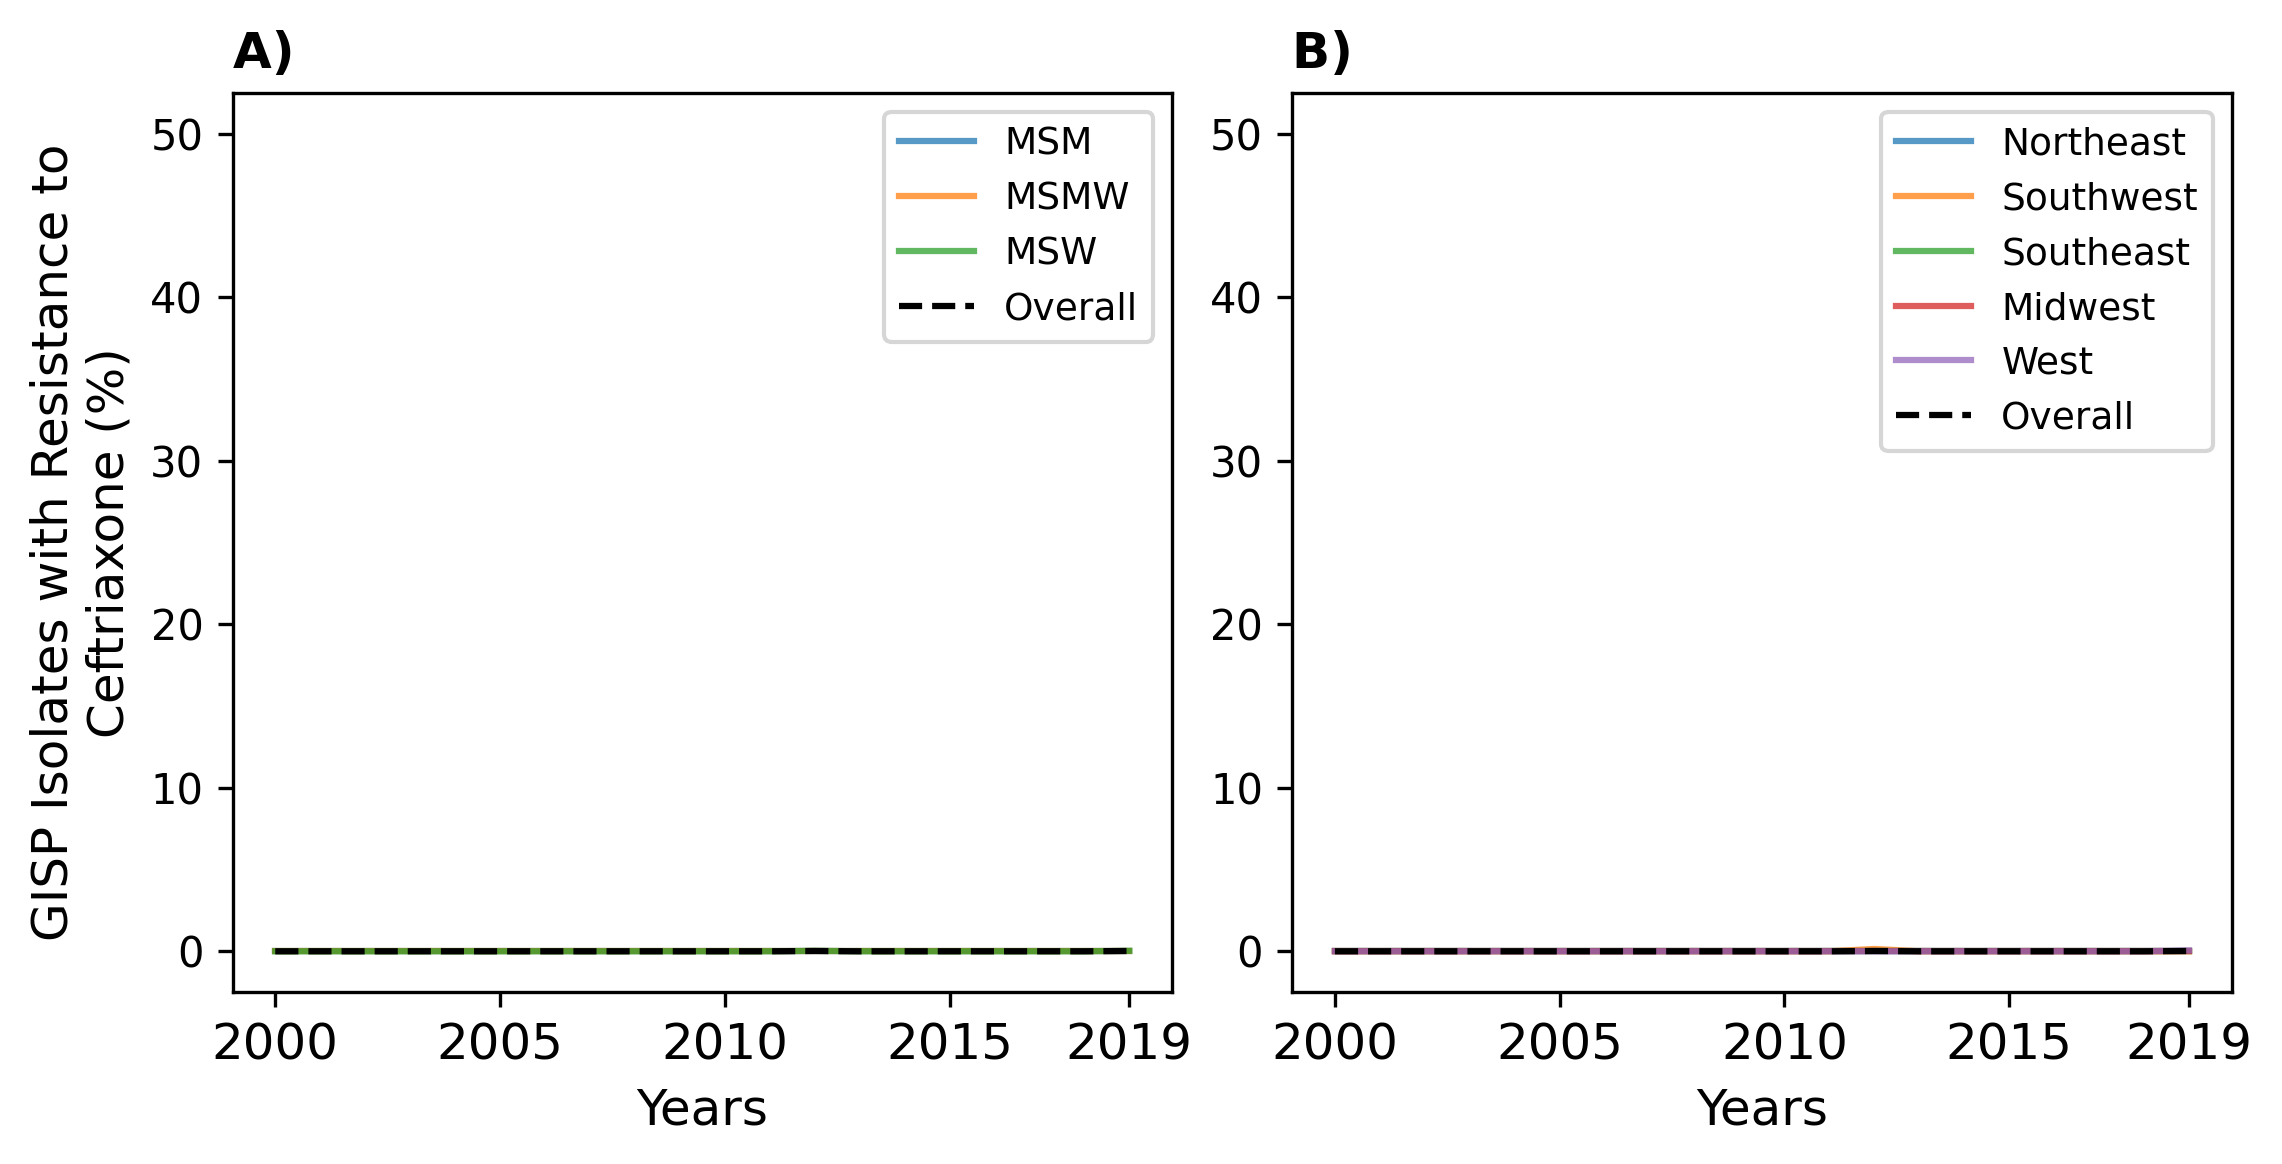

In [89]:
for drug in drugs:
    #matplotlib inline
    plt.subplots(figsize=(7.5, 3.75))
     
    #Gender
    plt.subplot(1, 2, 1)
    for gender in list(set(df["GENDERSP"])):
         if (gender!="Oth/Unk/Missing"):
            plt.plot(overall["Year"], overall[gender+"_"+drug+"Pct"], label=gender, alpha=0.75)
    plt.plot(overall["Year"], overall[drug+"_OverallPct"], label="Overall", color="black", linestyle='--')
    
    plt.title("A) ", loc='left', fontweight='bold')
    figureCount+=1
    plt.xlabel("Years", fontsize=12)
    plt.ylabel("GISP Isolates with Resistance to\n{} (%)".format(drugs_name[drug]), fontsize=12)
    plt.xticks(xAxisYears, fontsize=12)
    plt.ylim(-2.5, 52.5)
    plt.legend(fontsize=9)

    #Region
    plt.subplot(1, 2, 2)
    for region in list(set(df["Region"])):
        plt.plot(overall["Year"], overall[region+"_"+drug+"_Pct"], label = region, alpha=0.75)
    plt.plot(overall["Year"], overall[drug+"_OverallPct"], label="Overall", color="black", linestyle='--')
    
    plt.title("B) ", loc='left', fontweight='bold')
    figureCount+=1
    plt.xlabel("Years", fontsize=12)
    plt.xticks(xAxisYears, fontsize=12)
    plt.ylim(-2.5, 52.5)
    plt.legend(fontsize=9)
    plt.tight_layout(pad=.25)

    #Save Combined Gender and Figure Graphs
    #plt.savefig("images/" + drug + '.png', facecolor='white', transparent=False, dpi=300)
